In [41]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from typing import List
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression


In [43]:
# Data preparation
df = pd.read_csv('complete_houses_mod.csv')
df.drop('Unnamed: 0', inplace=True, axis=1)
df.drop('Price of square meter', inplace=True, axis=1)

def remove_outliers(df: pd.DataFrame, columns: List[str], n_std: int) -> pd.DataFrame:
    for col in columns:
        mean = df[col].mean()
        sd = df[col].std()
        df = df[(df[col] <= mean+(n_std*sd))]
    return df

df = remove_outliers(df, ['Living area'], 2)
df = remove_outliers(df, ['Surface of the land'], 3)
df = remove_outliers(df, ['Garden surface'], 3)
df = remove_outliers(df, ['Terrace surface'], 3)
df = remove_outliers(df, ['Number of rooms'], 3)

# Feature selection
features = list(df.drop(columns=['Price','Zip', 'id','Primary energy consumption']).columns)
X = df[features]
y = df['Price']

In [34]:
# Instantiate the scaler
scaler = StandardScaler()

# Feature selection
selector = SelectKBest(score_func=f_regression, k=11)
X = selector.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101) 

# Normalize the training and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fitting the model and making predictions
lm = LinearRegression() 
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

# Scoring the model
score = lm.score(X_test, y_test)

# Getting selected features
mask = selector.get_support()
selected_features = [feature for feature, boolean in zip(features, mask) if boolean]

# Creating coefficient DataFrame
coeff_df = pd.DataFrame(lm.coef_.reshape(-1, 1), index=selected_features, columns=['Coefficient'])

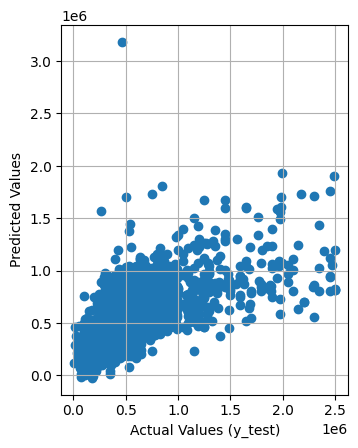

In [35]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.axis('scaled')
plt.show()

In [36]:
print(f'coeff_df:{coeff_df}')
print( '\n')
print(f'X_train.shape: {X_train.shape}')
print(f'X.shape : {X.shape} ')
print(f'Score:{score}')
print(f'Intercept: {lm.intercept_}')

coeff_df:                         Coefficient
Living area            150465.605611
Number of rooms         53258.636372
Garden surface          -4902.641061
Terrace surface          3739.754658
Open fire               14929.889248
Surface of the land     42452.770279
Number of facades       16001.754207
Swimming pool           32550.215519
Building Cond. values   35448.083113
Kitchen values          48145.532252
Energy efficiency       22919.162464


X_train.shape: (5458, 11)
X.shape : (9098, 11) 
Score:0.5010631301923578
Intercept: 467366.6095639428


Train MSE: 65428915775.24111
Test MSE: 60747870433.143776


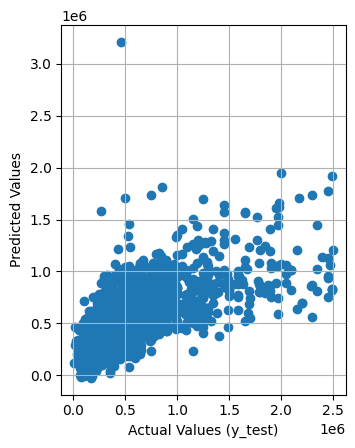

coeff_df:                         Coefficient
Living area            150508.080722
Number of rooms         53281.250018
Garden surface          -5198.461359
Terrace surface          3671.896137
Surface of the land     45268.334657
Number of facades       18239.213647
Swimming pool           34051.756691
Building Cond. values   36277.610877
Kitchen values          48275.299391
Energy efficiency       23256.768885


X_train.shape: (5458, 10)
X.shape : (9098, 10) 
Score:0.5010631301923578
Intercept: 467366.6095639428


In [46]:
# Feature selection
features = list(df.drop(columns=['Price','Zip', 'id','Primary energy consumption']).columns)
X = df[features]
y = df['Price']

# Scaling the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Select the best features
selector = SelectKBest(score_func=f_regression, k=10)
X = selector.fit_transform(X, y)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# Gradient Descent
n_iterations = 1000
learning_rate = 0.10

weights = np.zeros(X_train.shape[1] + 1)

X_train_with_intercept = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_with_intercept = np.c_[np.ones(X_test.shape[0]), X_test]

for iteration in range(n_iterations):
    gradients = 2/X_train.shape[0] * X_train_with_intercept.T.dot(X_train_with_intercept.dot(weights) - y_train)
    weights = weights - learning_rate * gradients

intercept, coefficients = weights[0], weights[1:]

# Making predictions
predictions_train = X_train_with_intercept.dot(weights)
predictions_test = X_test_with_intercept.dot(weights)

# Calculating the score
train_mse = np.mean((predictions_train - y_train)**2)
test_mse = np.mean((predictions_test - y_test)**2)

print('Train MSE:', train_mse)
print('Test MSE:', test_mse)

# Getting selected features
mask = selector.get_support()
selected_features = [feature for feature, boolean in zip(features, mask) if boolean]

# Creating coefficient DataFrame
coeff_df = pd.DataFrame(coefficients.reshape(-1, 1), index=selected_features, columns=['Coefficient'])

# Plotting predicted vs. actual values
plt.scatter(y_test, predictions_test)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.axis('scaled')
plt.show()

print(f'coeff_df:{coeff_df}')
print( '\n')
print(f'X_train.shape: {X_train.shape}')
print(f'X.shape : {X.shape} ')
print(f'Score:{score}')
print(f'Intercept: {lm.intercept_}')


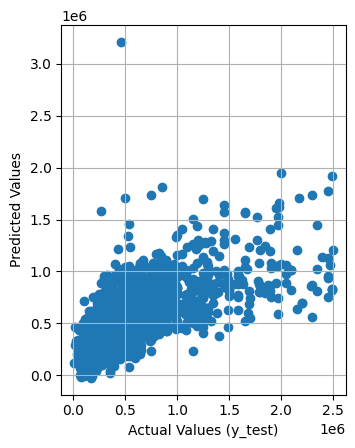

Intercept: 467366.6095639421
Coefficients: [[151245.97267226]
 [ 53673.10521882]
 [ -4771.9490954 ]
 [  3640.52464157]
 [ 43459.06138806]
 [ 18348.62982709]
 [ 32654.77107509]
 [ 35936.00884769]
 [ 48092.85881999]
 [ 23233.51663007]]


(-114500.0, 2624500.0, -184309.04360043438, 3344943.57352296)

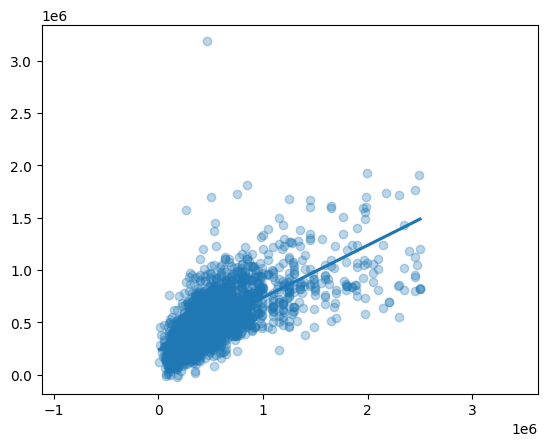

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler

class GradientDescentLinearRegression:
    def __init__(self, learning_rate=0.02, iterations=5000):
        self.learning_rate, self.iterations = learning_rate, iterations
    
    def fit_model(self, X, y):
        n = X.shape[0]
        m = X.shape[1] + 1  # added 1 for the intercept term
        self.theta = np.zeros((m, 1))
        y = y.reshape(n, 1)
        X = np.hstack((np.ones((n, 1)), X))  # adding column for intercept

        for _ in range(self.iterations):
            gradient = 2/n * X.T @ (X @ self.theta - y)
            self.theta = self.theta - self.learning_rate * gradient
            
    def predict_model(self, X):
        n = X.shape[0]
        X = np.hstack((np.ones((n, 1)), X))  # add intercept term
        return X @ self.theta

df = pd.read_csv('complete_houses_mod.csv')
df.drop('Unnamed: 0', inplace=True, axis=1)
df.drop('Price of square meter', inplace=True, axis=1)

def remove_outliers(df: pd.DataFrame, columns: List[str], n_std: int) -> pd.DataFrame:
    for col in columns:
        mean = df[col].mean()
        sd = df[col].std()
        df = df[(df[col] <= mean+(n_std*sd))]
    return df

df = remove_outliers(df, ['Living area'], 2)
df = remove_outliers(df, ['Surface of the land'], 3)
df = remove_outliers(df, ['Garden surface'], 3)
df = remove_outliers(df, ['Terrace surface'], 3)
df = remove_outliers(df, ['Number of rooms'], 3)


features = list(df.drop(columns=['Price','Zip', 'id','Primary energy consumption']).columns)
X = df[features].to_numpy()
y = df['Price'].to_numpy()

# Feature selection
selector = SelectKBest(score_func=f_regression, k=10)
X = selector.fit_transform(X, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101) 

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and fit the model
classifier = GradientDescentLinearRegression()
classifier.fit_model(X_train, y_train)

# Plot the actual vs predicted values
plt.scatter(y_test, classifier.predict_model(X_test))
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.axis('scaled')
plt.show()

# Print the learned parameters
print(f"Intercept: {classifier.theta[0][0]}")
print(f"Coefficients: {classifier.theta[1:]}")

sns.regplot(x=y_test,y=predictions,ci=None,scatter_kws={'alpha': 0.3})
plt.axis('equal')